In [2]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore")

In [12]:
#1
# Load the csv file
df=pd.read_csv('usgs_earthquakes.csv')
#do a sorting and select the top 50 of mag
sort_df=df.sort_values(by='mag',ascending=False)
top_50=sort_df.head(50).reset_index(drop=True)

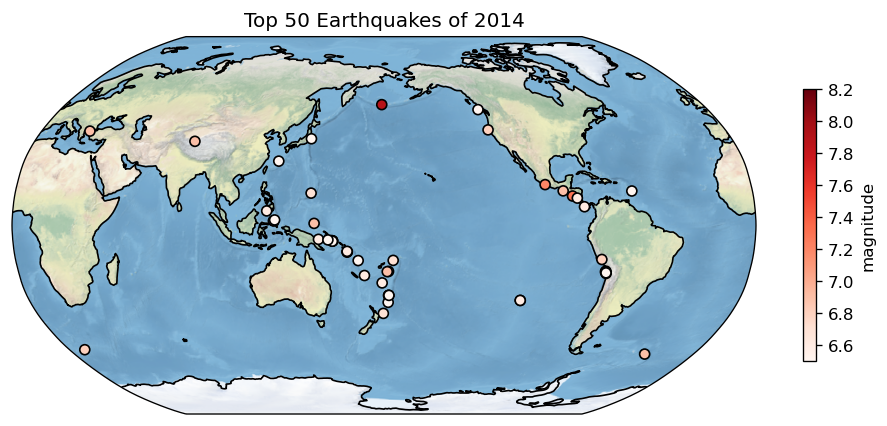

In [14]:
#make a figure
fig = plt.figure(figsize=(10, 5), dpi=120)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180,globe=None))
# make the map global rather than have it zoom in to the extents of any plotted data
ax.set_global()
ax.stock_img()
ax.coastlines()
ax.set_title('Top 50 Earthquakes of 2014')
#add points in the map
points = plt.scatter(top_50['longitude'],top_50['latitude'], marker='o', c=top_50['mag'], cmap='Reds', edgecolors='k',linewidths=1, transform=ccrs.PlateCarree())
#add colorbar include ticks,label
plt.colorbar(points,shrink=0.6,format='%.1f',ticks=[6.6,6.8,7.0,7.2,7.4,7.6,7.8,8.0,8.2],label='magnitude')
plt.show()

Text(114.03, 36.2, 'Handan')

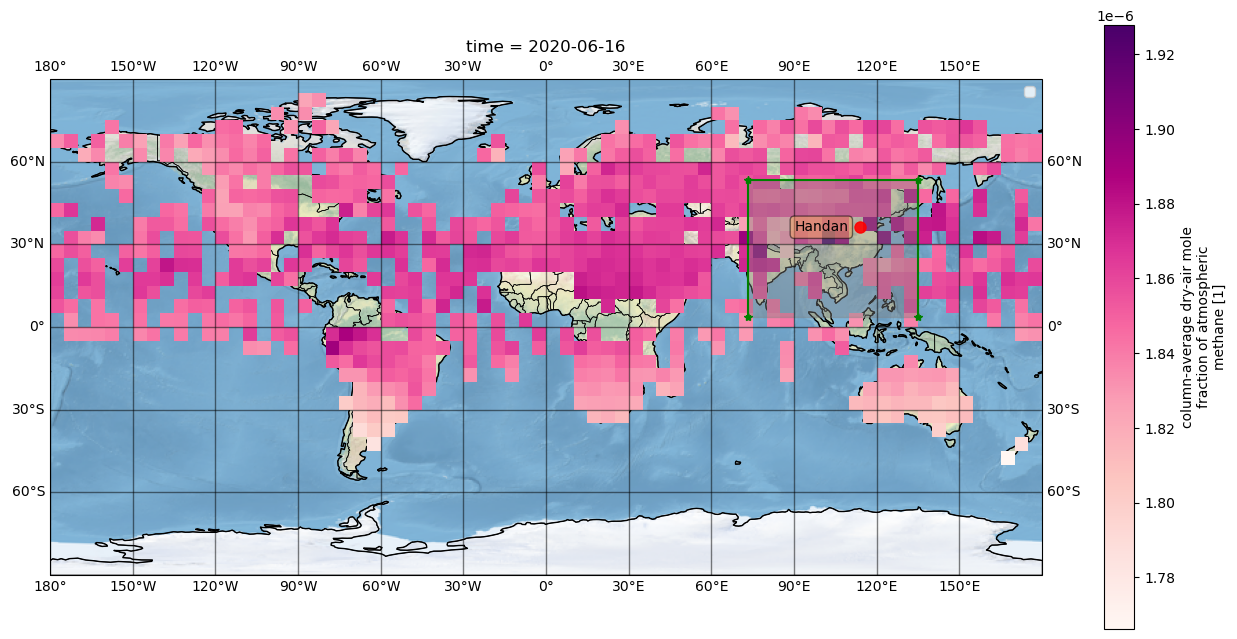

In [4]:
#2.1
from matplotlib.transforms import offset_copy
# Open a netCDF4 file
ds = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")
#Get the latest CH4 data
CH4 = ds.xch4.isel(time=-1)
# Create and define the size of a figure object 
plt.figure(figsize=(16,8),dpi=100)
# Create an axes with an basic PlateCarree projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
#set title
ax.set(title='CH4-2020-06')
# make the map global rather than have it zoom in to the extents of any plotted data 
ax.set_global()
ax.stock_img()
ax.coastlines()
# Add feateres (border lines over countries )
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Add lat/lon gridlines,tick labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5)
# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
#plot
CH4.plot(transform=ccrs.PlateCarree(),cmap='RdPu') 
plt.legend('')
#I don't know how to make annotations and text box,so i asked ShenHan about it,and this code is similar to his.
#Box out the scope of China
x, y =  [73.33,73.33,135.05,135.05] , [3.51,53.33,53.33,3.51]
ax.plot(x, y, marker='*',color='green', transform=ccrs.PlateCarree())
ax.fill(x, y, color='grey', transform=ccrs.PlateCarree(), alpha=0.4)
#mark the location 'Handan'
ax.plot(114.03,36.20, marker='o', color='red', markersize=8,
            alpha=0.9, transform=ccrs.Geodetic())
# #make Text Offset
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-12)  
# #add text
ax.text(114.03,36.20, 'Handan',      
             verticalalignment='center', horizontalalignment='right',
             transform=text_transform,
             bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))

Text(114.03, 36.2, 'Handan')

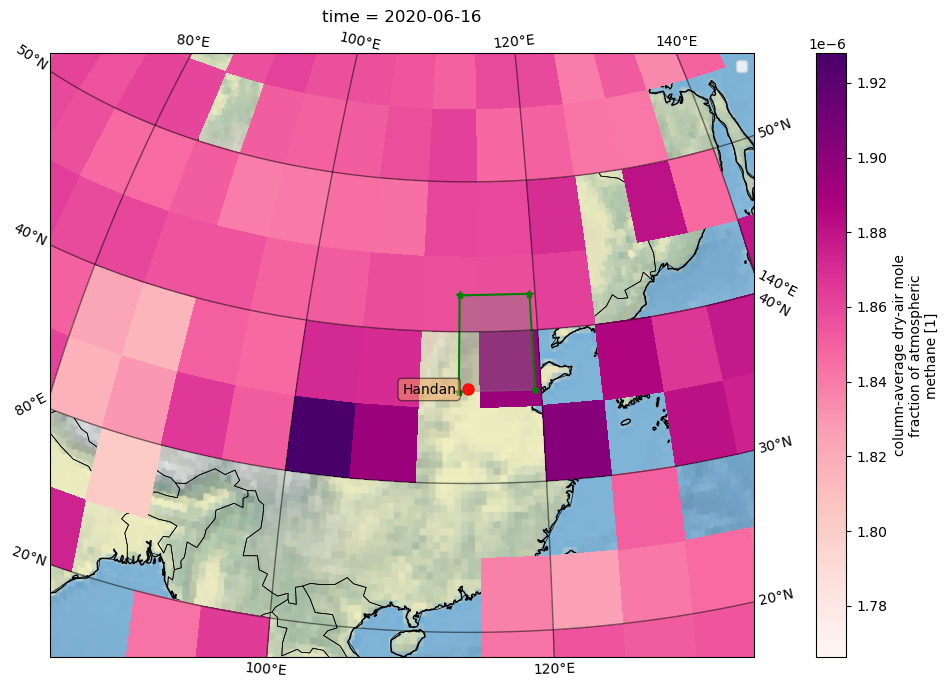

In [7]:
#2.2
# Create and define the size of a figure object 
plt.figure(figsize=(16,8), dpi=100)
# Set Orthographic projection style
central_lon, central_lat = 114.03,36.20 # Handan
proj = ccrs.Orthographic(central_lon, central_lat) 
# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)
#set title
ax.set(title='time = 2020-06-16')
# make the map global rather than have it zoom in to the extents of any plotted data 
ax.set_global()
ax.stock_img()
ax.coastlines()
# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
# Add gridlines,tick labels
ax.gridlines(draw_labels=True,linewidth=1, color='black', alpha=0.5)
plt.legend('')
CH4.plot(transform=ccrs.PlateCarree(),cmap='RdPu')
# Set a region and plot
extent = [central_lon-30, central_lon+20, central_lat-20, central_lat+20]
ax.set_extent(extent)
#Box out the scope of HeBei
x, y =  [113.27,113.27,119.50,119.50] , [36.05,42.40,42.40,36.05]
ax.plot(x, y, marker='*',color='green', transform=ccrs.PlateCarree())
ax.fill(x, y, color='grey', transform=ccrs.PlateCarree(), alpha=0.4)
#mark the location 'Handan'
ax.plot(114.03,36.20, marker='o', color='red', markersize=8,
            alpha=0.9, transform=ccrs.Geodetic())    
#make Text Offset
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-12)  
#add text
ax.text(114.03,36.20, 'Handan',      
            verticalalignment='center', horizontalalignment='right',
            transform=text_transform,
            bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))